In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from tabulate import tabulate
from IPython.display import display

In [3]:
data = pd.read_csv('channels.csv')

In [4]:
# Remove "data/" prefix from column names if it exists
data.columns = data.columns.str.replace('data/', '')
data.head()
#data.info()

,channel_tier_name,channel_tier,channel_tier_last,channel,channel_age,influential_casters/0,influential_casters/1,influential_casters/2,top_domains/0,top_domains/1,...,top_casters/6,top_casters/7,top_casters/8,top_casters/9,got_replies,wow_reply,got_likes,wow_likes,got_recasts,wow_recasts
0,stadium,4,4,masks,104,mistershot,meguce,angelikakollin,i.pinimg.com,code.lqotp.site,...,amir7867,mikaella,sadeq-sa,segnik,790429,-622771,858304.0,-401843.0,59548.0,-80249.0
1,stadium,4,4,superrare,286,ted,wellzy,mantine.eth,superrare.com,build.top,...,srfwswsrfwswstfj,song1004.eth,iim,5926559592655991,339485,-38447,627519.0,-20578.0,59032.0,4255.0
2,stadium,4,4,degen,335,purp,satoushi,samantha,build.top,wallet.coinbase.com,...,sarfraztanoli,alreadythere,zozypapa76,danelya,79972,932,105083.0,-6438.0,11580.0,1483.0
3,stadium,4,4,lp,183,mantine.eth,satoushi,wellzy,build.top,far.quest,...,punk2th,tomcruise0,dopplebin.eth,yongchi,161223,-35732,121333.0,-38920.0,19638.0,-6226.0
4,stadium,4,4,airstack,228,mantine.eth,meguce,mistershot,moxie-frames.airstack.xyz,build.top,...,mejakayu,7092285709228532,rondar,hong2004,81843,69876,141859.0,108391.0,25677.0,18588.0


In [5]:
# Relevant columns for analysis
columns_of_interest = ['channel_age', 'engagement', 'wow_engage', 'got_casts', 'wow_cast', 'casters', 
                       'wow_casters', 'onchain_experts', 'trading_experts', 'contract_experts', 
                       'active_npc', 'wow_npc', 'active_user','wow_active_user','active_star','wow_star','active_influencer','wow_influencer','active_vip','wow_vip', 'got_likes', 'got_replies', 'got_recasts', 
                       'wow_likes', 'wow_reply', 'wow_recasts']

### <font color='Blue'> Metrics by Channel_tier</font>

In [6]:

metrics = data.groupby(['channel_tier_name']).agg({
    'engagement': 'sum',
    'got_casts': 'sum',
    'casters': 'sum',
    'trading_experts': 'sum',
    'contract_experts': 'sum',
    'onchain_experts': 'sum',
    'got_replies': 'sum',
    'got_likes': 'sum',
    'got_recasts': 'sum',
}).reset_index()

# Print the metrics in a pretty table using tabulate
print("\nMetrics for each channel_tier_name:")
print(tabulate(metrics, headers='keys', tablefmt='psql', showindex=False))


Metrics for each channel_tier_name:
+---------------------+------------------+-------------+-----------+-------------------+--------------------+-------------------+---------------+------------------+---------------+
| channel_tier_name   |       engagement |   got_casts |   casters |   trading_experts |   contract_experts |   onchain_experts |   got_replies |        got_likes |   got_recasts |
|---------------------+------------------+-------------+-----------+-------------------+--------------------+-------------------+---------------+------------------+---------------|
| friends             | 220927           |       40691 |     51296 |             12358 |              10672 |             23818 |         90265 | 191693           |         20132 |
| niche               | 283071           |       33392 |     53250 |             12931 |              11021 |             26925 |        144367 | 302387           |         28043 |
| quiet               |  29017.7         |       10537 |  

### Key Insights

1. Stadium Tier Dominance:

The 'stadium' tier clearly outperforms other tiers in all metrics, indicating high engagement, content creation, and expert presence. This tier is likely the most active and influential.


2. Tier-Based Audience Behavior:

a. Friends and subculture tiers have similar high levels of engagement, casts, and likes, suggesting active communities with a strong focus on sharing and interaction.

b. Niche tier shows a good balance between engagement and expert presence, indicating a specialized audience with interest in deeper content.

c. Quiet tier has the lowest overall metrics, suggesting a less active or smaller audience.

#### Potential Actionable Insights

1. Focus on Stadium Tier: Prioritize growth and engagement strategies for the 'stadium' tier to maximize overall platform performance.
2. Niche Tier Development: Explore ways to increase content creation and sharing within the 'niche' tier to boost engagement.
3. Quiet Tier Activation: Implement strategies to encourage more activity and participation in the 'quiet' tier.

Utilize experts to create high-quality content and attract new users to specific tiers.

In [28]:
data = data[columns_of_interest]
# Remove rows with NaN or inf values
data = data[columns_of_interest].replace([np.inf, -np.inf], np.nan).dropna()

### <font color='Blue'> Exploratory Data Analysis </font>

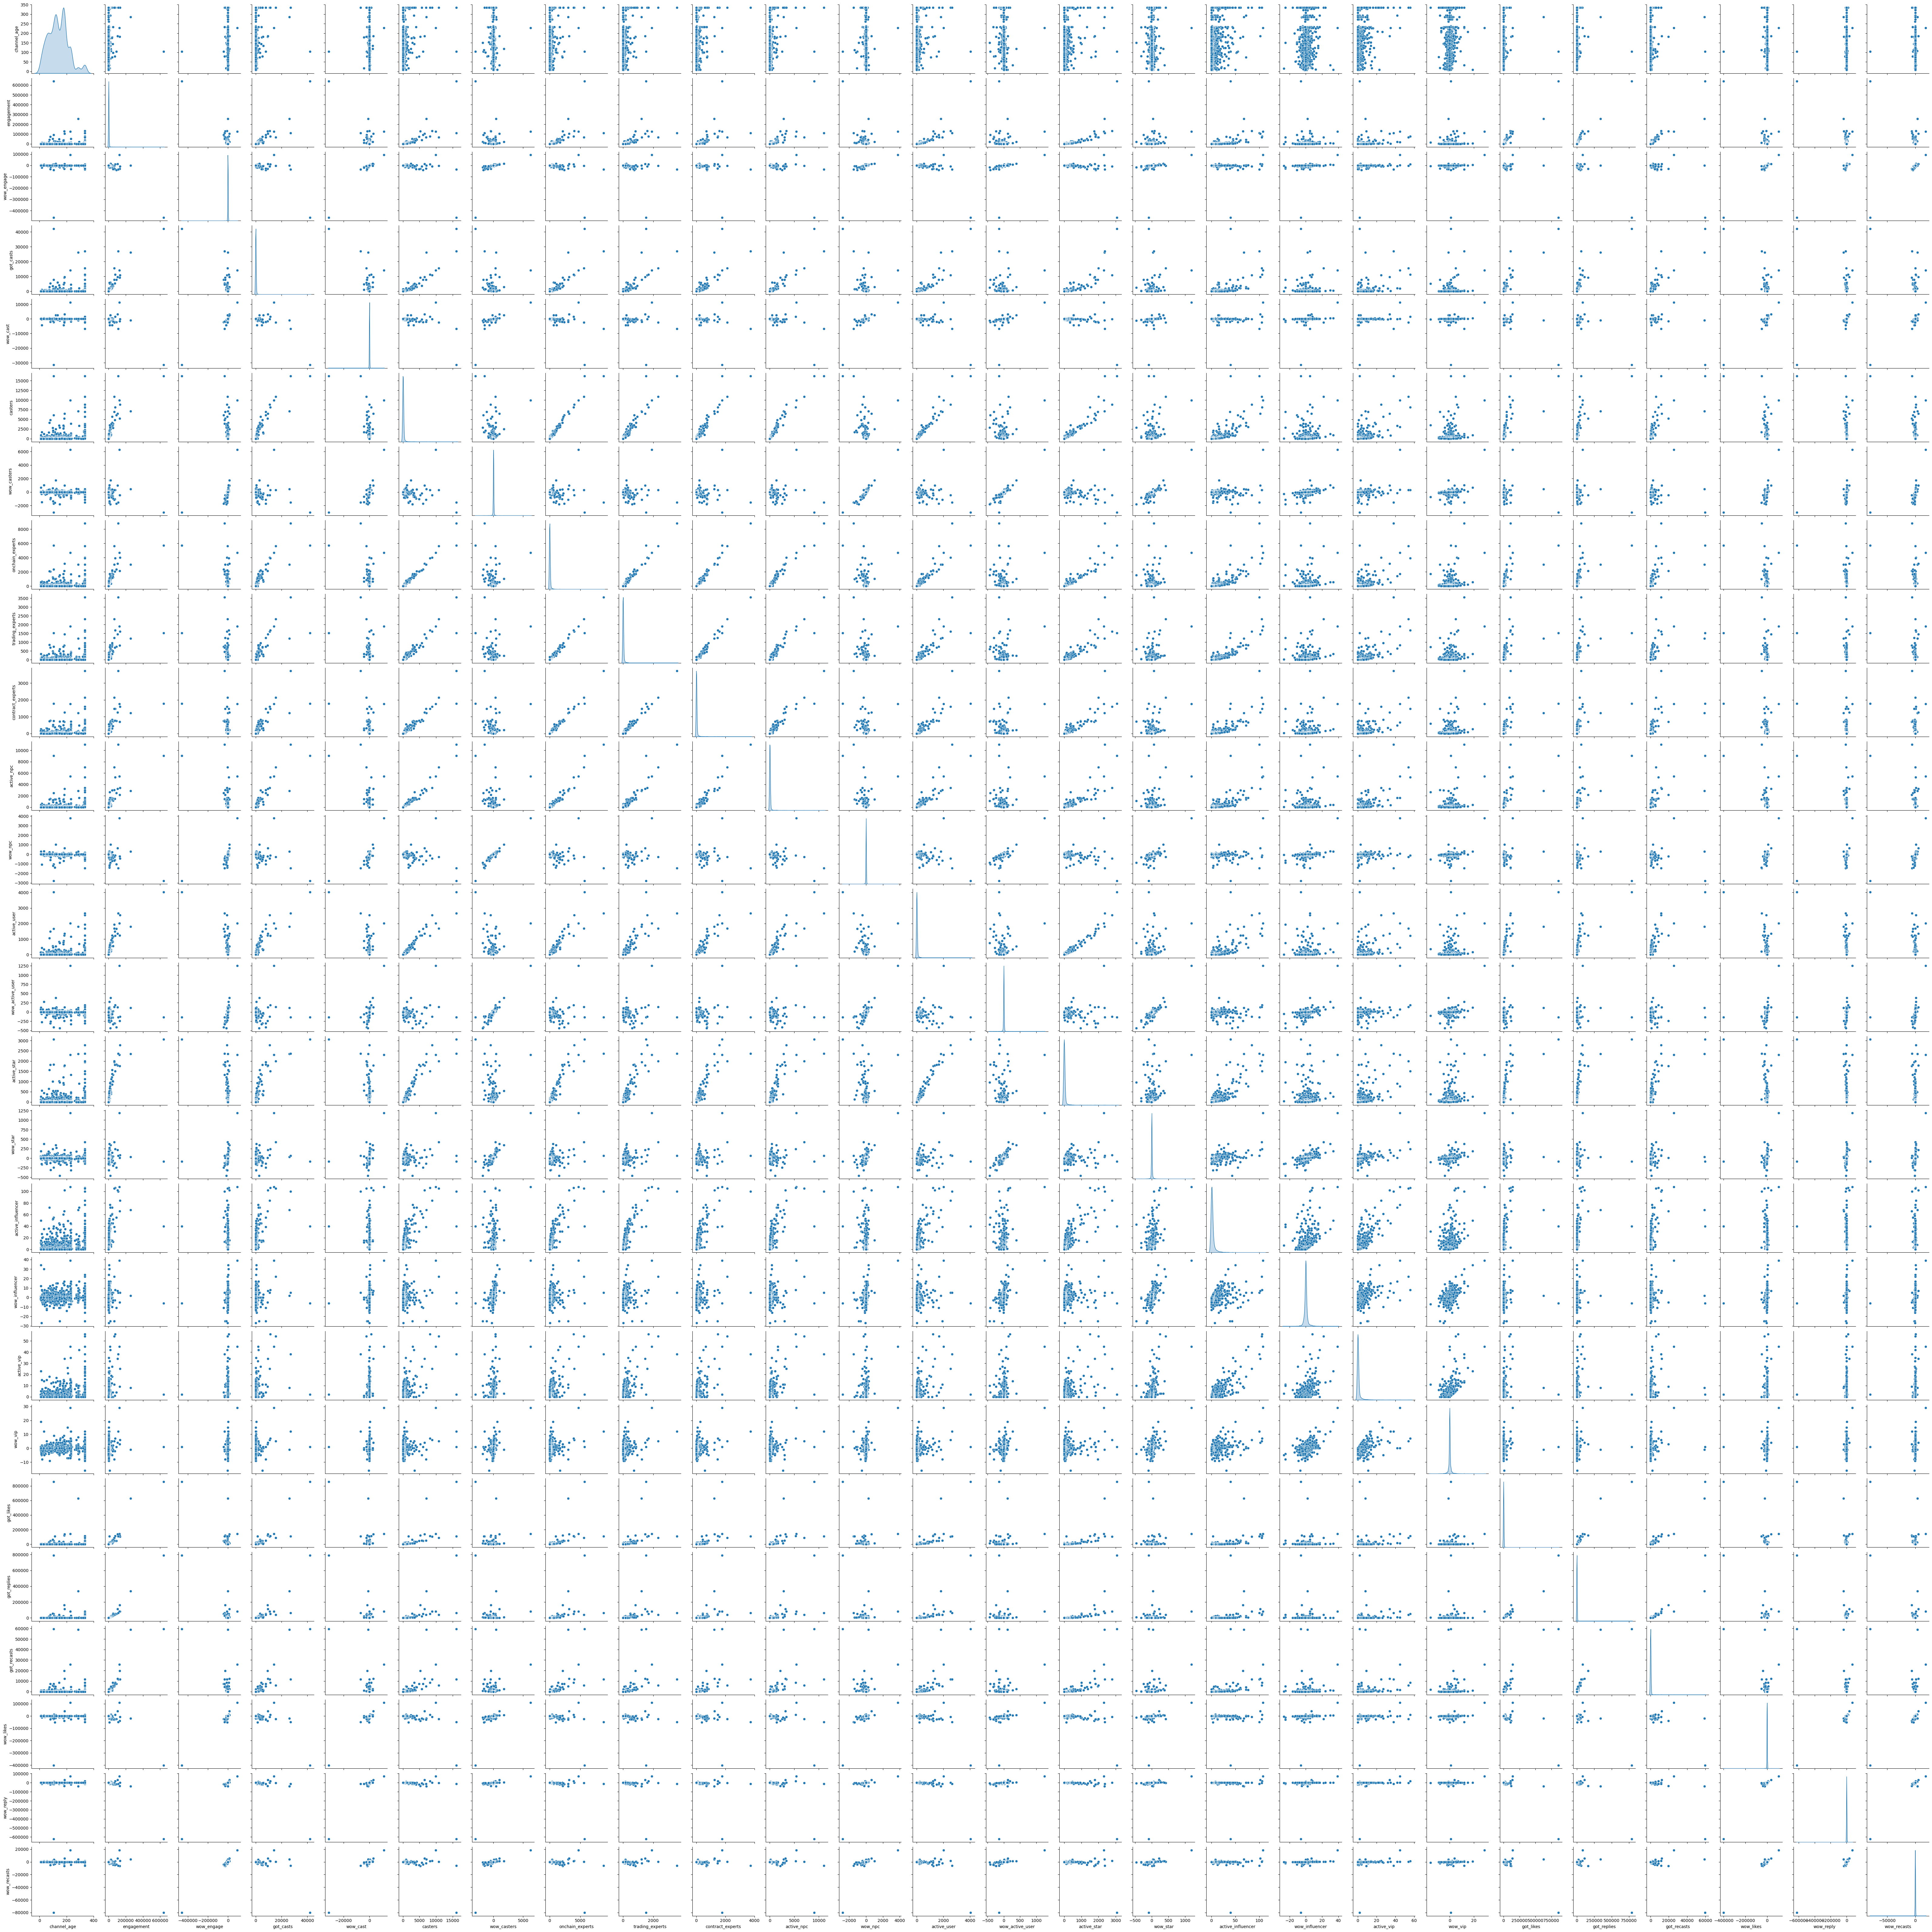

In [8]:
# Plotting Relationships for Numerical Columns
sns.pairplot(data, diag_kind='kde')
plt.show()

### <font color='Blue'>Hypothesis Testing</font>

#### Hypothesis 1. If channel_age is more, engagement is more.

In [9]:
age_engagement_corr, _ = pearsonr(data['channel_age'], data['engagement'])
print(f"Correlation between channel_age and engagement: {age_engagement_corr:.2f}")
if age_engagement_corr > 0:
    print("Hypothesis 1 supported: Older channels have higher engagement.")
else:
    print("Hypothesis 1 not supported.")

Correlation between channel_age and engagement: 0.07
Hypothesis 1 supported: Older channels have higher engagement.


#### Hypothesis 2. If channel_age is more, wow_engage is more.

In [10]:
age_wow_engage_corr, _ = pearsonr(data['channel_age'], data['wow_engage'])
print(f"Correlation between channel_age and wow_engage: {age_wow_engage_corr:.2f}")
if age_wow_engage_corr > 0:
    print("Hypothesis 2 supported: Older channels have higher wow_engage.")
else:
    print("Hypothesis 2 not supported.")

Correlation between channel_age and wow_engage: -0.00
Hypothesis 2 not supported.


#### Hypothesis 3. If channel_age is more, casts is more.

In [11]:
age_got_cast_corr, _ = pearsonr(data['channel_age'], data['got_casts'])
print(f"Correlation between channel_age and got_cast: {age_got_cast_corr:.2f}")
if age_got_cast_corr > 0:
    print("Hypothesis 3 supported: Older channels have more got_casts.")
else:
    print("Hypothesis 3 not supported.")

Correlation between channel_age and got_cast: 0.11
Hypothesis 3 supported: Older channels have more got_casts.


#### Hypothesis 4. If channel_age is more, wow_cast is more.

In [12]:

age_wow_cast_corr, _ = pearsonr(data['channel_age'], data['wow_cast'])
print(f"Correlation between channel_age and wow_cast: {age_wow_cast_corr:.2f}")
if age_wow_cast_corr > 0:
    print("Hypothesis 4 supported: Older channels have more wow_cast.")
else:
    print("Hypothesis 4 not supported.")

Correlation between channel_age and wow_cast: -0.01
Hypothesis 4 not supported.


#### Hypothesis 5. If channel_age is more, casters are more.

In [13]:

age_casters_corr, _ = pearsonr(data['channel_age'], data['casters'])
print(f"Correlation between channel_age and casters: {age_casters_corr:.2f}")
if age_casters_corr > 0:
    print("Hypothesis 5 supported: Older channels have more casters.")
else:
    print("Hypothesis 5 not supported.")

Correlation between channel_age and casters: 0.17
Hypothesis 5 supported: Older channels have more casters.


#### Hypothesis 6. If channel_age is more, wow_casters are more.

In [14]:

age_wow_casters_corr, _ = pearsonr(data['channel_age'], data['wow_casters'])
print(f"Correlation between channel_age and wow_casters: {age_wow_casters_corr:.2f}")
if age_wow_casters_corr > 0:
    print("Hypothesis 6 supported: Older channels have more wow_casters.")
else:
    print("Hypothesis 6 not supported.")

Correlation between channel_age and wow_casters: -0.01
Hypothesis 6 not supported.


#### Hypothesis 7. If channel_age is more, onchain_experts are more.

In [15]:
age_onchain_experts_corr, _ = pearsonr(data['channel_age'], data['onchain_experts'])
print(f"Correlation between channel_age and onchain_experts: {age_onchain_experts_corr:.2f}")
if age_onchain_experts_corr > 0:
    print("Hypothesis 7 supported: Older channels have more onchain_experts.")
else:
    print("Hypothesis 7 not supported.")

Correlation between channel_age and onchain_experts: 0.17
Hypothesis 7 supported: Older channels have more onchain_experts.


#### Hypothesis 8. If channel_age is more, trading_experts are more.

In [16]:

age_trading_experts_corr, _ = pearsonr(data['channel_age'], data['trading_experts'])
print(f"Correlation between channel_age and trading_experts: {age_trading_experts_corr:.2f}")
if age_trading_experts_corr > 0:
    print("Hypothesis 8 supported: Older channels have more trading_experts.")
else:
    print("Hypothesis 8 not supported.")

Correlation between channel_age and trading_experts: 0.20
Hypothesis 8 supported: Older channels have more trading_experts.


#### Hypothesis 9. If channel_age is more, contract_experts are more.

In [17]:

age_contract_experts_corr, _ = pearsonr(data['channel_age'], data['contract_experts'])
print(f"Correlation between channel_age and contract_experts: {age_contract_experts_corr:.2f}")
if age_contract_experts_corr > 0:
    print("Hypothesis 9 supported: Older channels have more contract_experts.")
else:
    print("Hypothesis 9 not supported.")

Correlation between channel_age and contract_experts: 0.18
Hypothesis 9 supported: Older channels have more contract_experts.


#### Hypothesis 10. If channel_age is more, active_npc is more.

In [18]:

age_active_npc_corr, _ = pearsonr(data['channel_age'], data['active_npc'])
print(f"Correlation between channel_age and active_npc: {age_active_npc_corr:.2f}")
if age_active_npc_corr > 0:
    print("Hypothesis 10 supported: Older channels have more active_npc.")
else:
    print("Hypothesis 10 not supported.")

Correlation between channel_age and active_npc: 0.17
Hypothesis 10 supported: Older channels have more active_npc.


#### Hypothesis 11. If channel_age is more, wow_npc is more.

In [19]:

age_wow_npc_corr, _ = pearsonr(data['channel_age'], data['wow_npc'])
print(f"Correlation between channel_age and wow_npc: {age_wow_npc_corr:.2f}")
if age_wow_npc_corr > 0:
    print("Hypothesis 11 supported: Older channels have more wow_npc.")
else:
    print("Hypothesis 11 not supported.")

Correlation between channel_age and wow_npc: -0.02
Hypothesis 11 not supported.


#### Hypothesis 12. If channel_age is more, likes are more.

In [20]:

age_likes_corr, _ = pearsonr(data['channel_age'], data['got_likes'])
print(f"Correlation between channel_age and likes: {age_likes_corr:.2f}")
if age_likes_corr > 0:
    print("Hypothesis 12 supported: Older channels have more likes.")
else:
    print("Hypothesis 12 not supported.")

Correlation between channel_age and likes: 0.05
Hypothesis 12 supported: Older channels have more likes.


#### Hypothesis 13. If channel_age is more, replies are more.

In [21]:

age_replies_corr, _ = pearsonr(data['channel_age'], data['got_replies'])
print(f"Correlation between channel_age and replies: {age_replies_corr:.2f}")
if age_replies_corr > 0:
    print("Hypothesis 13 supported: Older channels have more replies.")
else:
    print("Hypothesis 13 not supported.")

Correlation between channel_age and replies: 0.03
Hypothesis 13 supported: Older channels have more replies.


#### Hypothesis 14. If channel_age is more, recasts are more.

In [22]:

age_recasts_corr, _ = pearsonr(data['channel_age'], data['got_recasts'])
print(f"Correlation between channel_age and recasts: {age_recasts_corr:.2f}")
if age_recasts_corr > 0:
    print("Hypothesis 14 supported: Older channels have more recasts.")
else:
    print("Hypothesis 14 not supported.")

Correlation between channel_age and recasts: 0.06
Hypothesis 14 supported: Older channels have more recasts.


#### Hypothesis 15. If channel_age is more, wow_likes are more.

In [23]:

age_wow_likes_corr, _ = pearsonr(data['channel_age'], data['wow_likes'])
print(f"Correlation between channel_age and wow_likes: {age_wow_likes_corr:.2f}")
if age_wow_likes_corr > 0:
    print("Hypothesis 15 supported: Older channels have more wow_likes.")
else:
    print("Hypothesis 15 not supported.")

Correlation between channel_age and wow_likes: -0.01
Hypothesis 15 not supported.


#### Hypothesis 16. If channel_age is more, wow_replies are more.

In [24]:

age_wow_replies_corr, _ = pearsonr(data['channel_age'], data['wow_reply'])
print(f"Correlation between channel_age and wow_replies: {age_wow_replies_corr:.2f}")
if age_wow_replies_corr > 0:
    print("Hypothesis 16 supported: Older channels have more wow_replies.")
else:
    print("Hypothesis 16 not supported.")

Correlation between channel_age and wow_replies: 0.01
Hypothesis 16 supported: Older channels have more wow_replies.


#### Hypothesis 17. If channel_age is more, wow-recasts are more.

In [25]:

age_wow_recasts_corr, _ = pearsonr(data['channel_age'], data['wow_recasts'])
print(f"Correlation between channel_age and wow_recasts: {age_wow_recasts_corr:.2f}")
if age_wow_recasts_corr > 0:
    print("Hypothesis 17 supported: Older channels have more wow-recasts.")
else:
    print("Hypothesis 17 not supported.")

Correlation between channel_age and wow_recasts: 0.01
Hypothesis 17 supported: Older channels have more wow-recasts.


#### Hypothesis 18. If casters for a channel are more, engagement is more.

In [26]:

casters_engagement_corr, _ = pearsonr(data['casters'], data['engagement'])
print(f"Correlation between casters and engagement: {casters_engagement_corr:.2f}")
if casters_engagement_corr < 0:
    print("Hypothesis 18 supported: More casters are associated with more engagement.")
else:
    print("Hypothesis 18 not supported.")

Correlation between casters and engagement: 0.79
Hypothesis 18 not supported.
